## Example

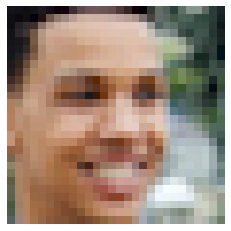

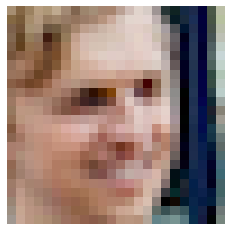

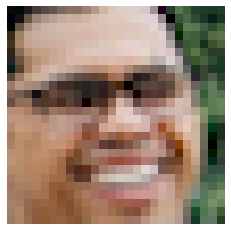

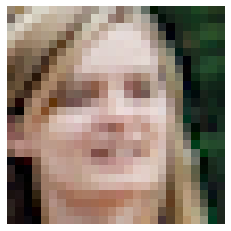

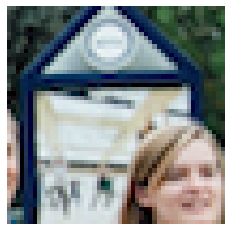

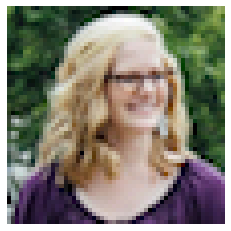

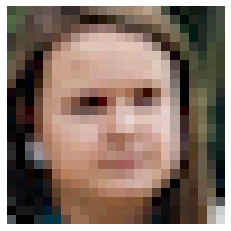

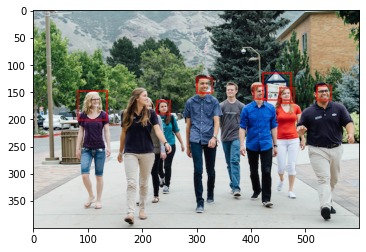

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import urllib.request

# download image as class.jpg
url = 'http://apmonitor.com/pds/uploads/Main/students_walking.jpg'
urllib.request.urlretrieve(url, 'class.jpg')

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%i
        plt.savefig(filename)
        plt.show()

pixels = plt.imread('class.jpg')
faceCascade = cv2.CascadeClassifier('cascade.xml')
gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
                                     minNeighbors=2,\
                                     minSize=(10, 10))

# display only the faces
draw_faces(pixels, faces)            

# display identified faces on original image
fig, ax = plt.subplots(); ax.imshow(pixels)
for (x, y, w, h) in faces:
    rect = patches.Rectangle((x, y), w, h, lw=2, \
                             alpha=0.5, edgecolor='r', \
                             facecolor='none')
    ax.add_patch(rect)

plt.show()

## Actual Code

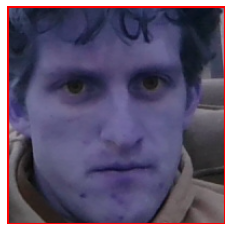

In [39]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%i
        plt.savefig(filename)
        plt.show()

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

faceCascade = cv2.CascadeClassifier('cascade.xml')
video_capture = cv2.VideoCapture(0)

t = time.time()
while time.time()-t <=5: # run for max 10 sec
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
        minNeighbors=5,minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

if len(faces) > 0:
    draw_faces(frame,faces)

else:
    print(f'No faces detected.')